<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,0.002317,277.480171,277.478257,0.001914
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-0.007512,306.116956,306.125400,-0.008444
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-0.006997,236.050815,236.057631,-0.006816
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-0.012148,257.592637,257.605545,-0.012907
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-0.002509,241.748986,241.751616,-0.002630
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.000719,286.270279,286.271946,-0.001666
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,0.016195,144.872944,144.855052,0.017892
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.000116,289.419100,289.419931,-0.000831
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.004089,224.809981,224.806155,0.003825


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,0.002317,277.480171,277.478257,0.001914
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-0.007512,306.116956,306.125400,-0.008444
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-0.006997,236.050815,236.057631,-0.006816
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-0.012148,257.592637,257.605545,-0.012907
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-0.002509,241.748986,241.751616,-0.002630
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.000719,286.270279,286.271946,-0.001666
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,0.016195,144.872944,144.855052,0.017892
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.000116,289.419100,289.419931,-0.000831
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.004089,224.809981,224.806155,0.003825


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  0.002317  277.480171   
      1.0    74.393251  42.734809  97.765649  81.230758 -0.007512  306.116956   
      2.0    59.297489  63.996252  77.034237  25.729835 -0.006997  236.050815   
      3.0    76.571705  35.079692  80.797695  55.155693 -0.012148  257.592637   
      4.0    83.247381  74.183606  33.658857  40.661651 -0.002509  241.748986   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.000719  286.270279   
      116.0  31.688675  25.414744  23.219725  54.533604  0.016195  144.872944   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.000116  289.419100   
      118.0  57.437085  27.018286  95.604289  34.746231  0.004089  224.809981   
      119.0  66.765062  20.783276  29.409634  27.520957 -0.013106  154.465823   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.478257  0.001914  
      1.0    306.125400 -0.008444  
      2.0    236.057631 -0.006816  
      3.0    257.605545 -0.012907  
      4.0    241.751616 -0.002630  
...                 ...       ...  
999.0 115.0  286.271946 -0.001666  
      116.0  144.855052  0.017892  
      117.0  289.419931 -0.000831  
      118.0  224.806155  0.003825  
      119.0  154.478311 -0.012489  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  0.002317  277.480171   
      1.0    74.393251  42.734809  97.765649  81.230758 -0.007512  306.116956   
      2.0    59.297489  63.996252  77.034237  25.729835 -0.006997  236.050815   
      3.0    76.571705  35.079692  80.797695  55.155693 -0.012148  257.592637   
      4.0    83.247381  74.183606  33.658857  40.661651 -0.002509  241.748986   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.000719  286.270279   
      116.0  31.688675  25.414744  23.219725  54.533604  0.016195  144.872944   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.000116  289.419100   
      118.0  57.437085  27.018286  95.604289  34.746231  0.004089  224.809981   
      119.0  66.765062  20.783276  29.409634  27.520957 -0.013106  154.465823   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.478257  0.001914  
      1.0    306.125400 -0.008444  
      2.0    236.057631 -0.006816  
      3.0    257.605545 -0.012907  
      4.0    241.751616 -0.002630  
...                 ...       ...  
999.0 115.0  286.271946 -0.001666  
      116.0  144.855052  0.017892  
      117.0  289.419931 -0.000831  
      118.0  224.806155  0.003825  
      119.0  154.478311 -0.012489  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,0.002317,277.480171,277.478257,0.001914
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-0.007512,306.116956,306.125400,-0.008444
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-0.006997,236.050815,236.057631,-0.006816
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-0.012148,257.592637,257.605545,-0.012907
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-0.002509,241.748986,241.751616,-0.002630
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.000719,286.270279,286.271946,-0.001666
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,0.016195,144.872944,144.855052,0.017892
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.000116,289.419100,289.419931,-0.000831
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.004089,224.809981,224.806155,0.003825


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  0.002317  277.480171   
      1.0    74.393251  42.734809  97.765649  81.230758 -0.007512  306.116956   
      2.0    59.297489  63.996252  77.034237  25.729835 -0.006997  236.050815   
      3.0    76.571705  35.079692  80.797695  55.155693 -0.012148  257.592637   
      4.0    83.247381  74.183606  33.658857  40.661651 -0.002509  241.748986   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.000719  286.270279   
      116.0  31.688675  25.414744  23.219725  54.533604  0.016195  144.872944   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.000116  289.419100   
      118.0  57.437085  27.018286  95.604289  34.746231  0.004089  224.809981   
      119.0  66.765062  20.783276  29.409634  27.520957 -0.013106  154.465823   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.478257  0.001914  
      1.0    306.125400 -0.008444  
      2.0    236.057631 -0.006816  
      3.0    257.605545 -0.012907  
      4.0    241.751616 -0.002630  
...                 ...       ...  
999.0 115.0  286.271946 -0.001666  
      116.0  144.855052  0.017892  
      117.0  289.419931 -0.000831  
      118.0  224.806155  0.003825  
      119.0  154.478311 -0.012489  

[120000 rows x 8 columns]

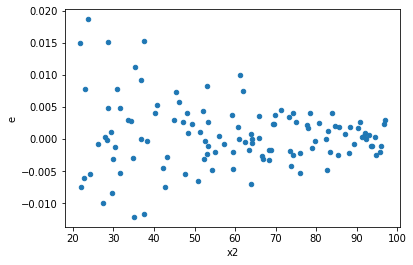

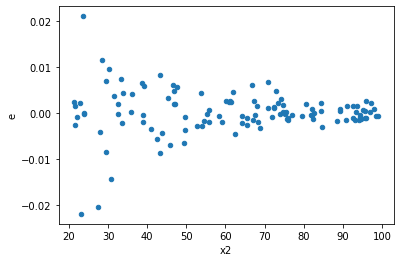

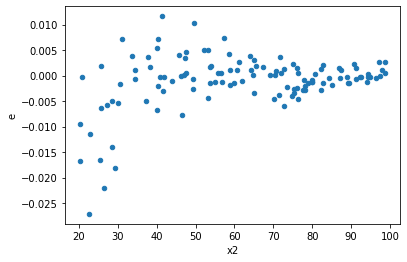

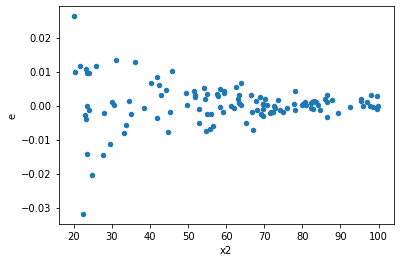

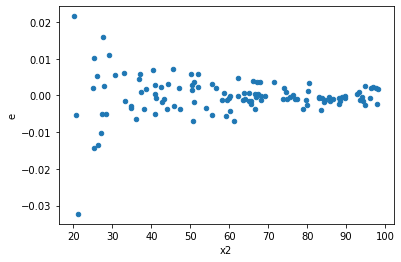

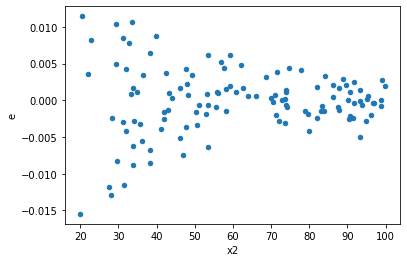

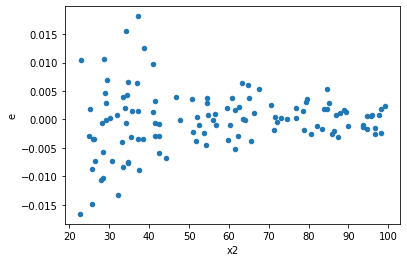

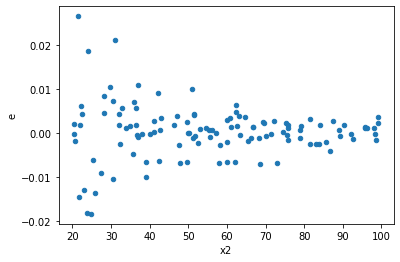

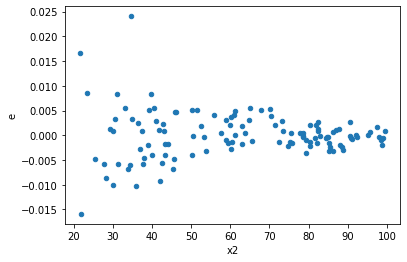

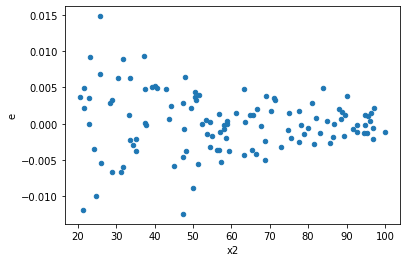

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
33.0,44.0,44.0,0.0012388375089780314,0.0015322662577682243,2.8155397931318895e-05,3.482423313109601e-05,1.2368581405258343,0.4836894691859901,0.758155265407005,0.24184473459299505,Reject005=1 : Homoscedasticity
78.0,44.0,44.0,0.0008655327726132923,0.0009631843306681843,1.9671199377574826e-05,2.1890552969731462e-05,1.1128224847686055,0.7244979755221481,0.6377510122389259,0.36224898776107406,Reject005=1 : Homoscedasticity
79.0,44.0,44.0,0.0010045143331702425,0.0010890762313699766,2.2829871208414602e-05,2.475173253113583e-05,1.0841818731773165,0.7898436145979264,0.6050781927010368,0.3949218072989632,Reject005=1 : Homoscedasticity
95.0,44.0,44.0,0.0009863884374195968,0.000990770001065042,2.2417919032263562e-05,2.2517500024205497e-05,1.00444202656806,0.9883380345115169,0.5058309827442415,0.49416901725575846,Reject005=1 : Homoscedasticity
119.0,44.0,44.0,0.0009865066971773092,0.001312617273263075,2.2420606754029756e-05,2.983221075597898e-05,1.330571071660097,0.3470612863518383,0.8264693568240808,0.17353064317591915,Reject005=1 : Homoscedasticity
142.0,44.0,44.0,0.0010570197041789228,0.0010941591852599182,2.402317509497552e-05,2.4867254210452687e-05,1.0351360347722607,0.9093322460928734,0.5453338769535633,0.4546661230464367,Reject005=1 : Homoscedasticity
181.0,44.0,44.0,0.0016380720983340548,0.0021746861175292414,3.7228911325773976e-05,4.942468448930094e-05,1.3275887671494626,0.3508500854550236,0.8245749572724882,0.1754250427275118,Reject005=1 : Homoscedasticity
182.0,44.0,44.0,0.0008499358892458403,0.0010935360882335335,1.931672475558728e-05,2.485309291439849e-05,1.2866100867958912,0.4065381601400997,0.7967309199299502,0.20326908007004985,Reject005=1 : Homoscedasticity
219.0,44.0,44.0,0.001514266813000843,0.0015518789897511337,3.4415154840928255e-05,3.52699770397985e-05,1.0248385399636106,0.9355122229371422,0.5322438885314289,0.4677561114685711,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.001279091954925796,0.000948487513938897,2.9070271702859e-05,2.1556534407702205e-05,0.7415319205833967,0.32493977578515,Reject005=1 : Homoscedasticity
1.0,44.0,44.0,0.0015030746267840893,0.0003624980717717094,3.416078697236567e-05,8.238592540266122e-06,0.24117104055391705,6.377973695562673e-06,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,0.0017740001948152965,0.0008182015654184091,4.031818624580219e-05,1.8595490123145663e-05,0.4612184191465649,0.011685431194762673,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,0.002654157872773965,0.0013385629345179031,6.032176983577193e-05,3.0421884875406888e-05,0.5043267954211473,0.025344047670868102,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,0.00250377656482066,0.00037592902990655,5.690401283683318e-05,8.543841588785227e-06,0.15014479933574942,4.539949635448243e-09,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,0.0012984154241421735,0.00036959753840346005,2.950944145777667e-05,8.399944054624092e-06,0.2846527633077393,5.843848657889371e-05,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,0.001504327317383066,0.0008804291199280491,3.41892572132515e-05,2.000975272563748e-05,0.5852643302786307,0.07903922586487834,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,0.0022871179844750652,0.0009126624772018355,5.197995419261512e-05,2.0742329027314443e-05,0.3990447731148894,0.0028912299016752817,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,0.0012820192986546396,0.0007847804308641745,2.9136802242150898e-05,1.7835918883276693e-05,0.6121440072608336,0.10727364951810422,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    842
Reject005=1 : Homoscedasticity      158
Name: Result_test, dtype: int64